## Simple Linear Regression

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [37]:
df = pd.read_csv('/Users/sai./Documents/Projects/project1/weight_height_dataset_1000_samples.csv')
df.head()

,Weight,Height
0,77.450712,183.993554
1,67.926035,179.246337
2,79.715328,170.596304
3,92.845448,163.530632
4,66.487699,176.982233


In [38]:
df.shape

(1000, 2)

In [39]:
def rounded(row):
    return round(row,2)

df['Weight'] = df['Weight'].apply(rounded)

df['Height'] = df['Height'].apply(rounded)

In [40]:
df.head()

,Weight,Height
0,77.45,183.99
1,67.93,179.25
2,79.72,170.60
3,92.85,163.53
4,66.49,176.98


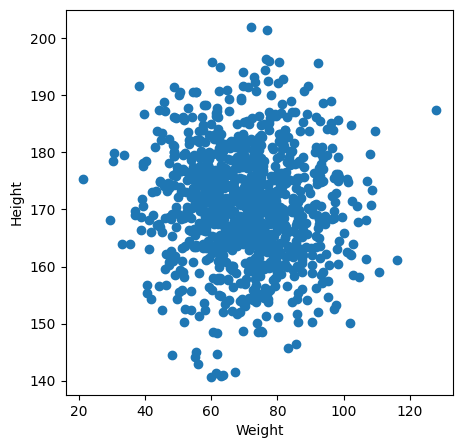

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(x='Weight',y='Height',data = df)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

In [53]:
X = df[['Weight']]
y = df[['Height']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=57)


In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 1), (300, 1), (700,), (300,))

In [49]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()

X_train = std_sclr.fit_transform(X_train)


In [51]:
X_train[:10]

array([[-1.74418583],
       [-0.20492825],
       [-0.46969445],
       [-0.1667074 ],
       [-1.72889749],
       [-0.15489369],
       [ 1.2252262 ],
       [-0.50166097],
       [-0.86788614],
       [-0.55725493]])

In [54]:
X_test = std_sclr.transform(X_test)

In [55]:
X_test[:10]

array([[-1.64064209],
       [-0.86093689],
       [-1.52945418],
       [-0.94988722],
       [-0.13960535],
       [-1.73515181],
       [-0.58088236],
       [-0.31611615],
       [ 1.40938117],
       [-0.84634348]])

In [58]:
## Training the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)


LinearRegression()

In [60]:
preds = lin_reg.predict(X_test)
preds[:10]

/Users/sai./Documents/Projects/project1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[174.02442835],
       [173.98889555],
       [174.01936128],
       [173.9929492 ],
       [173.95602296],
       [174.02873535],
       [173.97613287],
       [173.96406692],
       [173.88543239],
       [173.98823049]])

In [63]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds,y_test)

np.float64(7.962392989995248)

In [64]:
lin_reg.coef_

array([[-0.0455721]])

In [65]:
lin_reg.intercept_

array([173.94966085])

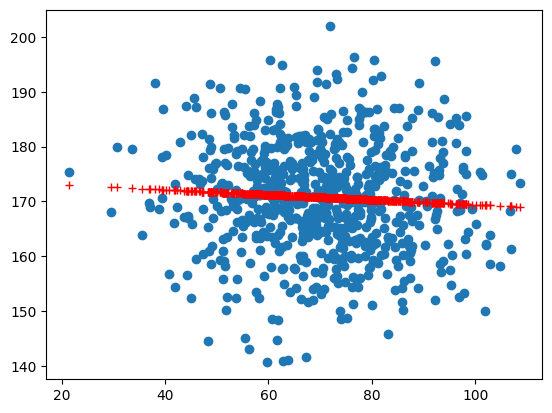

In [66]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lin_reg.predict(X_train),'r+')

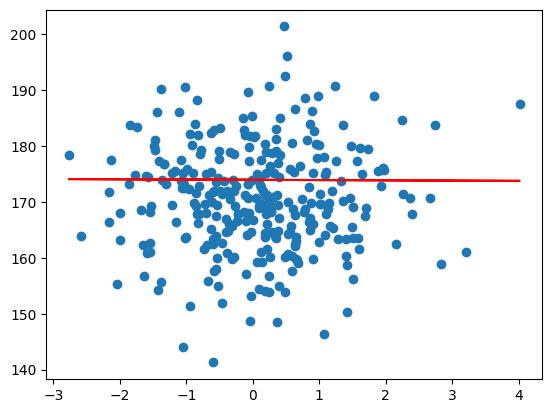

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,preds,'r')

In [71]:
##Performance metrics 

##MSE,MSE
## R square, Adjusted R square

from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(preds,y_test)
mae = mean_absolute_error(preds,y_test)
rmse = np.sqrt(mse)

In [72]:
mae,mse,rmse

(np.float64(7.962392989995248),
 np.float64(100.27061996603851),
 np.float64(10.013521856272073))

In [73]:
from sklearn.metrics import r2_score

score = r2_score(y_test,preds)
score

-0.12641213420612551

In [75]:
scaled_weight = std_sclr.transform([[80]])

print(lin_reg.predict(scaled_weight))

[[173.91817831]]


/Users/sai./Documents/Projects/project1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/sai./Documents/Projects/project1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
residuals = y_test - preds
residuals[:10]

,Height
775,-17.224428
340,-2.378896
95,-4.829361
513,-22.662949
319,-5.826023
789,9.371265
458,8.923867
77,-8.244067
65,-15.085432
379,14.271770


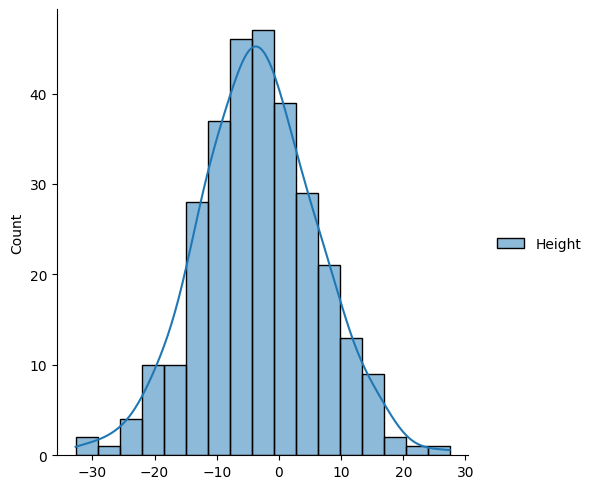

In [78]:
import seaborn as sns
sns.displot(residuals,kde=True)